In [1]:
import construction as cs
import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

# Load generated graphs

In [2]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name):
    path = "../Generated_graphs/Multiple_run/"+file_name+"/"
    gap = 299 
    graphs = []
    for i in os.listdir(path):
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs


def load_dym_graph(file_name):
    path = "../Competitors_generated_graphs/Dymond/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_stm_graph(file_name):
    path = "../Competitors_generated_graphs/STM/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_tag_graph(file_name):
    path = "../Competitors_generated_graphs/TagGen/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

In [3]:
import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from topological_metrics import *

import os

# Compute and store topological results

In [4]:

ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal


In [5]:
file_name = "High_School11"



In [6]:
def load_tmp(file_name,fn):
    orig_graphs = load_origin_graph(file_name,gap=299)
    tag_gen = cs.build_graphs(cs.load_data("../Competitors_generated_graphs/TagGen/Multiple_run/"+file_name+"/"+file_name+"_4_generato_TagGen.dat"),0)
    stm_gen = cs.build_graphs(cs.load_data("../Competitors_generated_graphs/STM/Multiple_run/"+file_name+"/"+file_name+"_STM_0.dat"),0)
    dym_gen = cs.build_graphs(cs.load_data("../Competitors_generated_graphs/Dymond/Multiple_run/"+file_name+"/"+file_name+"_dym0.dat"),0)
    etn_gen = cs.build_graphs(cs.load_data("../Generated_graphs/Multiple_run/"+file_name+"/"+fn+"_0.dat"),299)
    
    return orig_graphs,etn_gen,stm_gen,tag_gen,dym_gen

In [7]:

def comp_metric(metric,o,e,s,t,d,norm=True):
    orig = metric(o)
    tag = metric(t)
    etn = metric(e)
    stm = metric(s)
    dym = metric(d)
    
    if norm:
        orig = list(np.array(orig)/max(orig))
        tag = list(np.array(tag)/max(tag))
        etn = list(np.array(etn)/max(etn))
        stm = list(np.array(stm)/max(stm))
        dym = list(np.array(dym)/max(dym))

    return orig,etn,stm,tag,dym

In [8]:

def tmp(ax,orig,etn,stm,tag,dym,name,remove=False):
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)

    ax.spines['top'].set_color('#DDDDDD')
    ax.spines['right'].set_color('#DDDDDD')
    ax.spines['left'].set_color('#DDDDDD')
    ax.spines['bottom'].set_color('#DDDDDD')



    data = orig
    col = ORIGINAL_COLOR
    lw = 3
    violin_parts = ax.violinplot(data,positions=[1], showmeans=False, showmedians=False,showextrema=False)
    for pc in violin_parts['bodies']:
        pc.set_edgecolor(col)
        pc.set_facecolor(col)
        pc.set_linewidth(lw)

    data = etn
    col = ETN_COLOR
    violin_parts = ax.violinplot(data,positions=[1.75], showmeans=False, showmedians=False,showextrema=False)
    for pc in violin_parts['bodies']:
        pc.set_edgecolor(col)
        pc.set_facecolor(col)
        pc.set_linewidth(lw)

    data = tag
    col = TAG_COLOR
    violin_parts = ax.violinplot(data,positions=[2.5], showmeans=False, showmedians=False,showextrema=False)
    for pc in violin_parts['bodies']:
        pc.set_edgecolor(col)
        pc.set_facecolor(col)
        pc.set_linewidth(lw)


    data = stm
    col = STM_COLOR
    violin_parts = ax.violinplot(data,positions=[3.25], showmeans=False, showmedians=False,showextrema=False)
    for pc in violin_parts['bodies']:
        pc.set_facecolor(col)
        pc.set_edgecolor(col)
        pc.set_linewidth(lw)


    data = dym
    col = DYM_COLOR
    violin_parts = ax.violinplot(data,positions=[4], showmeans=False, showmedians=False,showextrema=False)
    for pc in violin_parts['bodies']:
        pc.set_facecolor(col)
        pc.set_edgecolor(col)
        pc.set_linewidth(lw)

  
    ax.set_yticks([1,0.1,0.01,0.001,0.0001])
    ax.set_yticklabels(["1",r"$10^{-1}$",r"$10^{-2}$",r"$10^{-3}$",r"$10^{-4}$"])

    ax.set_xticks([1,1.75,2.5,3.25,4])
    ax.set_xticklabels(["Original","ETN-Gen","TagGen","STM","Dymond"],rotation=0)
    ax.set_title(name)
    ax.set_yscale("log")
    ax.yaxis.grid(True, color='#EEEEEE')

In [9]:
metric = dist_frequency_of_interactions
o,e,s,t,d = load_tmp("LH10","lh")
o1,e1,s1,t1,d1 = comp_metric(metric,o,e,s,t,d,False)

o,e,s,t,d = load_tmp("InVS13","in")
o2,e2,s2,t2,d2 = comp_metric(metric,o,e,s,t,d,False)

o,e,s,t,d = load_tmp("High_School11","hs")
o3,e3,s3,t3,d3 = comp_metric(metric,o,e,s,t,d,False)

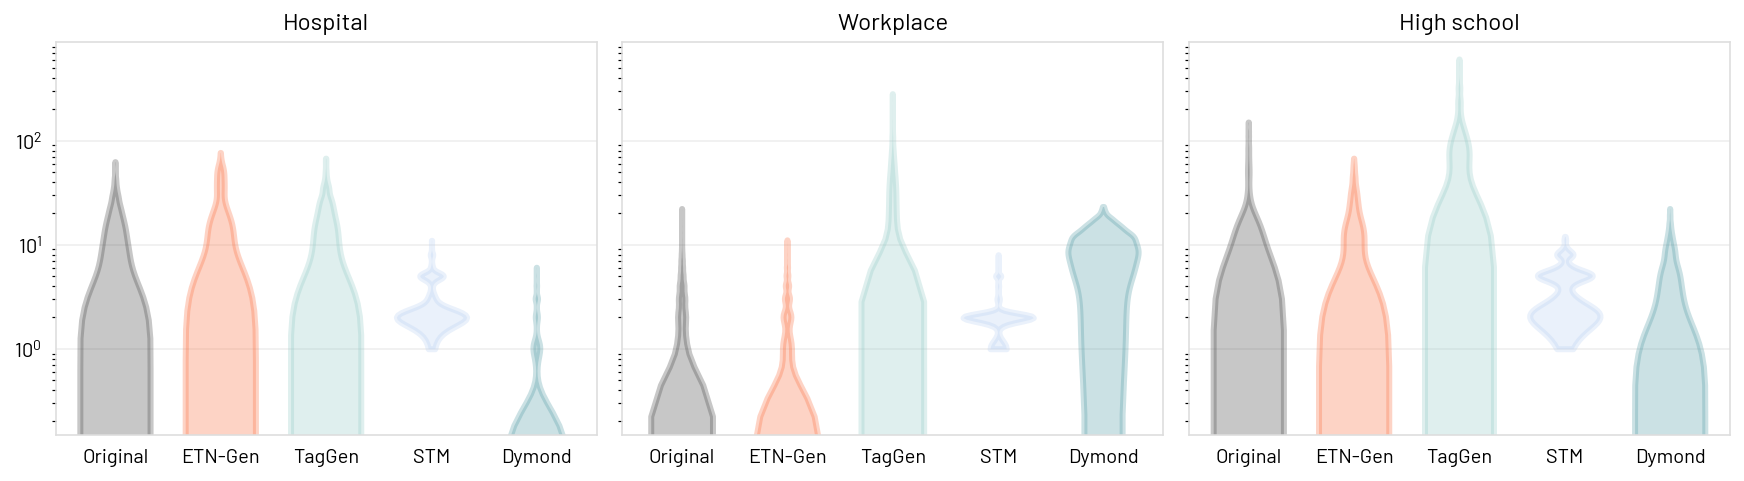

In [10]:
#plt.figure(figsize=(5,3))
#ax = plt.gca()
fig, ax = plt.subplots(1,3,figsize=(12,3),sharey=True)
fig.tight_layout(pad=0)


tmp(ax[0],o1,e1,s1,t1,d1,"Hospital")
tmp(ax[1],o2,e2,s2,t2,d2,"Workplace",True)
tmp(ax[2],o3,e3,s3,t3,d3,"High school",True)

fig.savefig("dist_nb_int.pdf", bbox_inches='tight')

In [25]:

def tmp2(ax,orig,etn,stm,tag,dym,name,remove=False):
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)

    ax.spines['top'].set_color('#DDDDDD')
    ax.spines['right'].set_color('#DDDDDD')
    ax.spines['left'].set_color('#DDDDDD')
    ax.spines['bottom'].set_color('#DDDDDD')

    
    data = orig
    col = ORIGINAL_COLOR
    lw = 3
    violin_parts = ax.violinplot(data,positions=[1], showmeans=False, showmedians=False,showextrema=False)
    for pc in violin_parts['bodies']:
        pc.set_edgecolor(col)
        pc.set_facecolor(col)
        pc.set_linewidth(lw)

    data = etn
    col = ETN_COLOR
    violin_parts = ax.violinplot(data,positions=[1.75], showmeans=False, showmedians=False,showextrema=False)
    for pc in violin_parts['bodies']:
        pc.set_edgecolor(col)
        pc.set_facecolor(col)
        pc.set_linewidth(lw)

    data = tag
    col = TAG_COLOR
    violin_parts = ax.violinplot(data,positions=[3.25], showmeans=False, showmedians=False,showextrema=False)
    for pc in violin_parts['bodies']:
        pc.set_edgecolor(col)
        pc.set_facecolor(col)
        pc.set_linewidth(lw)


    data = stm
    col = STM_COLOR
    violin_parts = ax.violinplot(data,positions=[2.5], showmeans=False, showmedians=False,showextrema=False)
    for pc in violin_parts['bodies']:
        pc.set_facecolor(col)
        pc.set_edgecolor(col)
        pc.set_linewidth(lw)


    data = dym
    col = DYM_COLOR
    violin_parts = ax.violinplot(data,positions=[4], showmeans=False, showmedians=False,showextrema=False)
    for pc in violin_parts['bodies']:
        pc.set_facecolor(col)
        pc.set_edgecolor(col)
        pc.set_linewidth(lw)

  
    #ax.set_yticks([1,0.1,0.01,0.001,0.0001])
    #ax.set_yticklabels(["1",r"$10^{-1}$",r"$10^{-2}$",r"$10^{-3}$",r"$10^{-4}$"])

    ax.set_xticks([1,1.75,2.5,3.25,4])
    ax.set_xticklabels(["Original","ETN-Gen","STM","TagGen","Dymond"],rotation=0)
    ax.set_title(name)
    ax.set_yscale("log")
    ax.yaxis.grid(True, color='#EEEEEE')

In [38]:
o,e,s,t,d = load_tmp("InVS13","in")

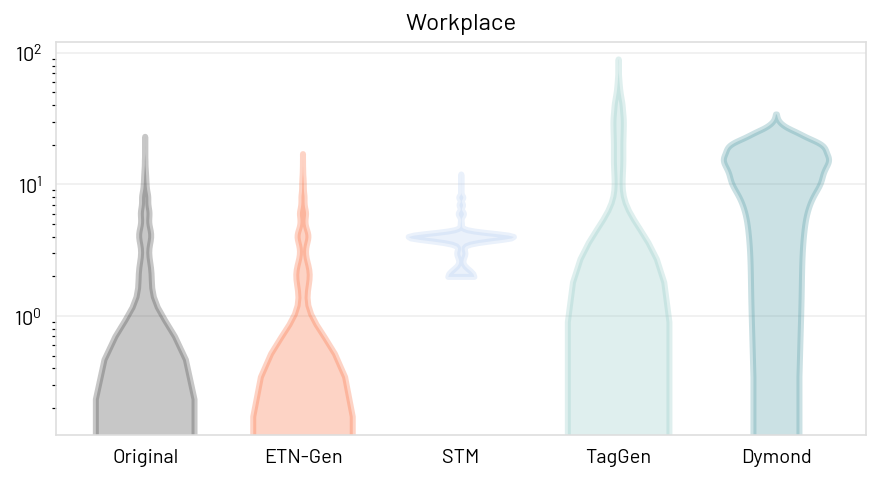

In [39]:
metric = dist_number_of_individuals
o2,e2,s2,t2,d2 = comp_metric(metric,o,e,s,t,d,False)

fig, ax = plt.subplots(1,1,figsize=(6,3))
fig.tight_layout(pad=0)

tmp2(ax,o2,e2,s2,t2,d2,"Workplace")
fig.savefig("dist_nb_int_workplace.pdf", bbox_inches='tight')

In [ ]:
res_etn = []
c = 0
print(len(etn_gen))
for graphs_gen in etn_gen:
    c = c + 1 
    print(c,len(graphs_gen[0].nodes()))
    res = compute_all_metrics(orig_graphs,graphs_gen)
    res = np.array(res)
    res = res[:,0]
    print(res)
    res_etn.append(res)

In [168]:
np.array(res_etn)

array([[0.10612597, 0.17169974, 0.24484848, 0.1078516 , 0.18485279,
        0.17958293, 0.10440035, 0.10612597, 0.04068413, 0.15991693],
       [0.17428818, 0.27351165, 0.39030303, 0.18809318, 0.31483685,
        0.28332193, 0.17773943, 0.17428818, 0.08458175, 0.22306517],
       [0.06384814, 0.12769629, 0.16735079, 0.06557377, 0.12548956,
        0.13641557, 0.06298533, 0.06384814, 0.02755948, 0.11945652],
       [0.54616048, 0.35720449, 0.63151515, 0.58584987, 0.81003954,
        0.62934181, 0.56686799, 0.54616048, 0.45549211, 0.28187388],
       [0.05608283, 0.09404659, 0.14424242, 0.05522002, 0.10096675,
        0.12565761, 0.05867127, 0.05608283, 0.0227337 , 0.09955253]])

In [169]:
file_name

'LH10'

In [170]:
np.save("topology_results/taggen/Multiple_run/topology_res_10runs_"+file_name+".npy",res_etn)

# load topology results

In [409]:

def load_topo_res(file_name):
    res_etn = np.load("topology_results/etngen/Multiple_run/topology_res_10runs_"+file_name+".npy")
    res_dym = np.load("topology_results/dymgen/Multiple_run/topology_res_10runs_"+file_name+".npy")
    res_stm = np.load("topology_results/stmgen/Multiple_run/topology_res_10runs_"+file_name+".npy")
    res_tag = np.load("topology_results/taggen/Multiple_run/topology_res_10runs_"+file_name+".npy")

    return [np.mean(res_etn,axis=0),np.std(res_etn,axis=0)],[np.mean(res_stm,axis=0),np.std(res_stm,axis=0)],[np.mean(res_tag,axis=0),np.std(res_tag,axis=0)],[np.mean(res_dym,axis=0),np.std(res_dym,axis=0)]


In [410]:


line_width = 1.5


ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal


In [411]:
labels = ["Density",
          "Global clustering \ncoefficient",
          "Average shortest\npath length",
          "Interacting\nindividuals",
          "New conversations",
          "Assortativity",
          "S-metric",        
          "Frequency of interactions",
          "Edge strength",
          "Duration of contacts"]

labels = labels

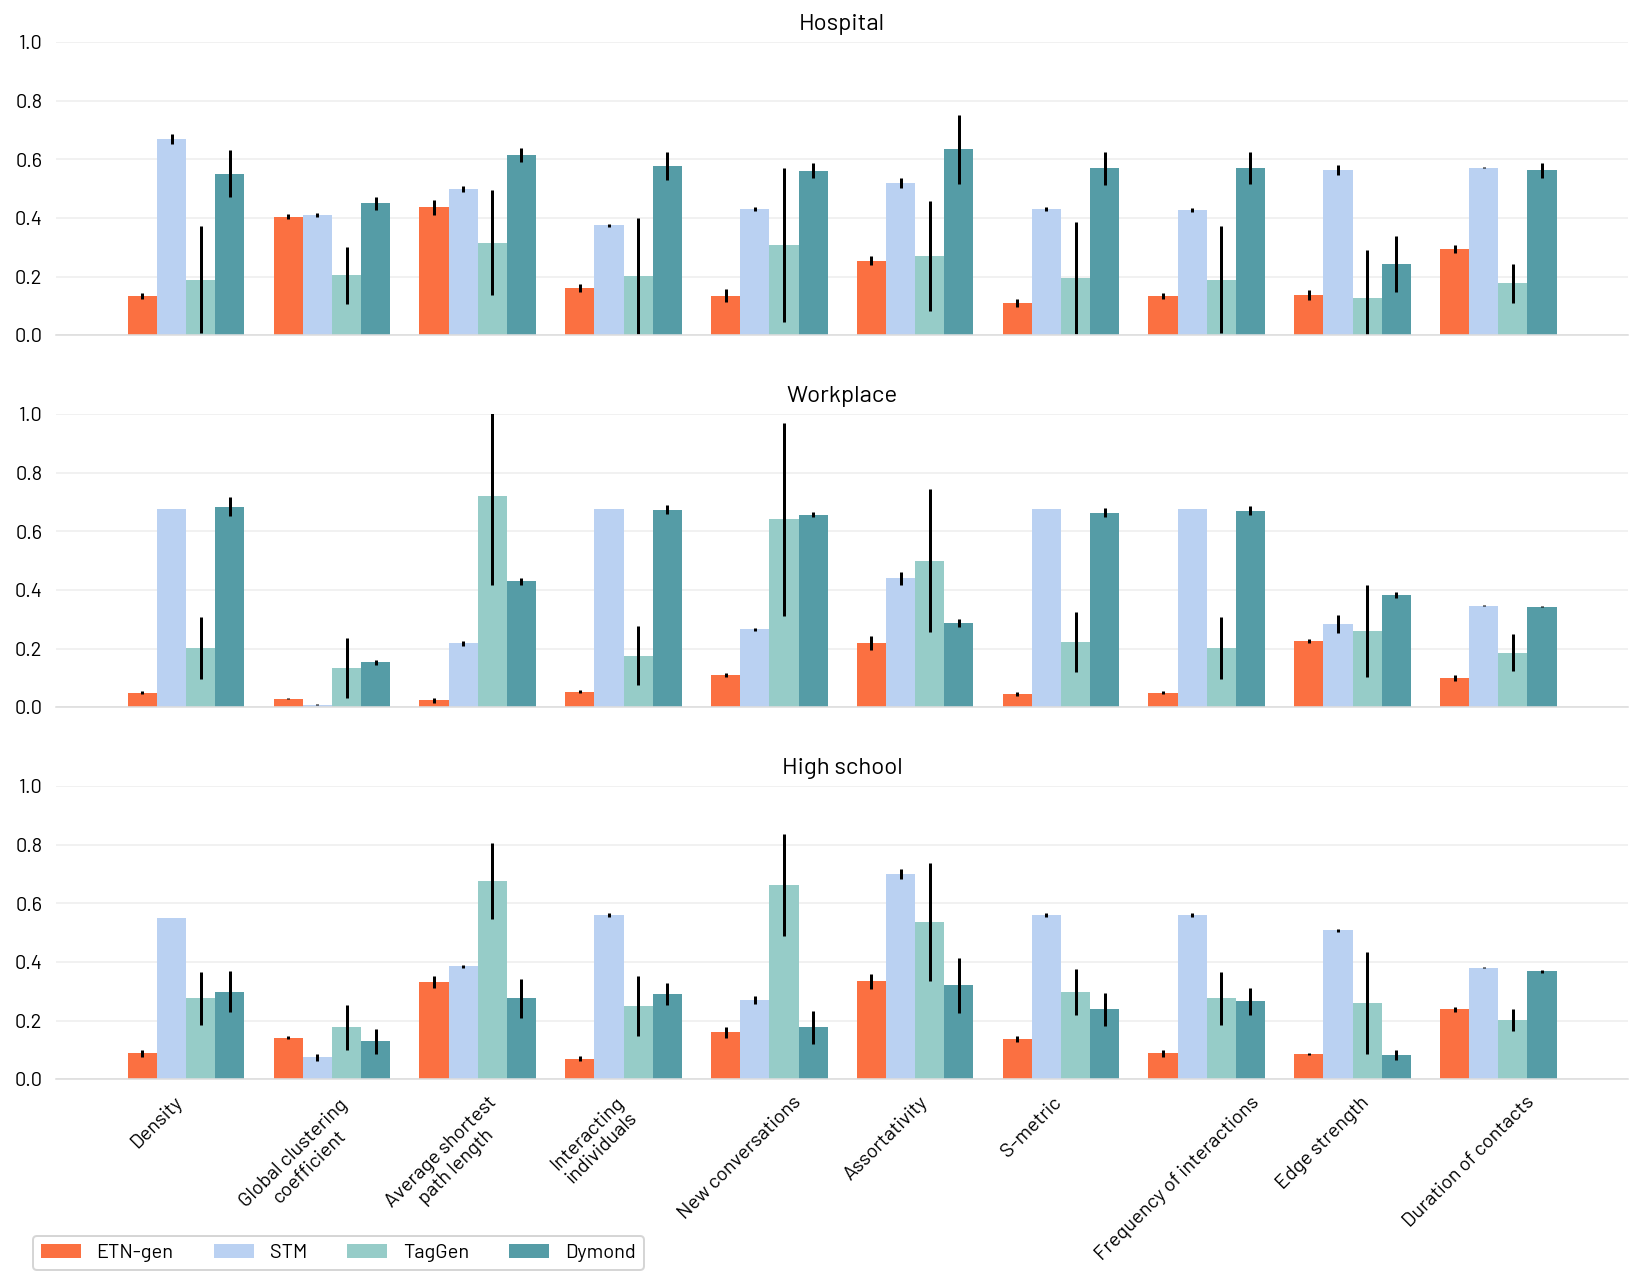

In [412]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


x1,x2,x3,x4 = load_topo_res("LH10")

x = np.arange(len(x1[0]))  # the label locations
width = 0.2  # the width of the bars


fig, ax = plt.subplots(3,1,figsize=(12,9))


ax[0].title.set_text("Hospital")
rects1 = ax[0].bar(x - width/2, x1[0], width, yerr=x1[1], label='ETN-gen',color=ETN_COLOR,ecolor=Error_bar_color)
rects2 = ax[0].bar(x + width/2, x2[0], width, yerr=x2[1],label='STM',color=STM_COLOR,ecolor=Error_bar_color)
rects3 = ax[0].bar(x + 0.3, x3[0], width, yerr=x3[1],label='TagGen',color=TAG_COLOR,ecolor=Error_bar_color)
rects4 = ax[0].bar(x + 0.3+0.2, x4[0], width, yerr=x4[1],label='Dymond',color=DYM_COLOR,ecolor=Error_bar_color)




x1,x2,x3,x4 = load_topo_res("InVS13")
ax[1].title.set_text("Workplace")
rects1 = ax[1].bar(x - width/2, x1[0], width, yerr=x1[1], label='ETN-gen',color=ETN_COLOR,ecolor=Error_bar_color)
rects2 = ax[1].bar(x + width/2, x2[0], width, yerr=x2[1],label='STM',color=STM_COLOR,ecolor=Error_bar_color)
rects3 = ax[1].bar(x + 0.3, x3[0], width, yerr=x3[1],label='TagGen',color=TAG_COLOR,ecolor=Error_bar_color)
rects4 = ax[1].bar(x + 0.3+0.2, x4[0], width, yerr=x4[1],label='Dymond',color=DYM_COLOR,ecolor=Error_bar_color)



x1,x2,x3,x4 = load_topo_res("High_School11")
ax[2].title.set_text("High school")
rects1 = ax[2].bar(x - width/2, x1[0], width, yerr=x1[1], label='ETN-gen',color=ETN_COLOR,ecolor=Error_bar_color)
rects2 = ax[2].bar(x + width/2, x2[0], width, yerr=x2[1],label='STM',color=STM_COLOR,ecolor=Error_bar_color)
rects3 = ax[2].bar(x + 0.3, x3[0], width, yerr=x3[1],label='TagGen',color=TAG_COLOR,ecolor=Error_bar_color)
rects4 = ax[2].bar(x + 0.3+0.2, x4[0], width, yerr=x4[1],label='Dymond',color=DYM_COLOR,ecolor=Error_bar_color)


ax[0].set_xticks(x)
ax[0].set_xticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=45)
ax[0].set_ylim(0,1)
ax[1].set_xticks(x)
ax[1].set_xticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=45)
ax[1].set_ylim(0,1)
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels,rotation=45)
ax[2].set_ylim(0,1)
#ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[0].tick_params(bottom=False, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].yaxis.grid(True, color='#EEEEEE')
ax[0].xaxis.grid(False)

ax[1].tick_params(bottom=False, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].yaxis.grid(True, color='#EEEEEE')
ax[1].xaxis.grid(False)

ax[2].tick_params(bottom=False, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].yaxis.grid(True, color='#EEEEEE')
ax[2].xaxis.grid(False)


ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_color('#DDDDDD')



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_color('#DDDDDD')



ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_color('#DDDDDD')

ax[2].legend(loc='upper right',ncol = 5,bbox_to_anchor=(0.38, -0.5))

fig.tight_layout()
#plt.savefig("topology_main.pdf", bbox_inches = 'tight')
plt.show()

In [413]:
x1

[array([0.08818714, 0.14209302, 0.33191491, 0.06990836, 0.16019095,
        0.33454317, 0.13640819, 0.08818714, 0.08665241, 0.23836418]),
 array([0.01275716, 0.00580082, 0.02107215, 0.00761342, 0.01850165,
        0.02496082, 0.01060877, 0.01275716, 0.00423169, 0.00848359])]

In [398]:
ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR = '#E5865E' # arancio
STM_COLOR = '#95D1D3' # light blue
TAG_COLOR = '#8F2E27' # rosso
DYM_COLOR = '#558B8F' # teal



ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal


line_width = 1.5

In [419]:

def load_topo_res_dist(file_name):
    res_etn = np.load("topology_results/etngen/Multiple_run/topology_res_10runs_"+file_name+".npy")
    res_dym = np.load("topology_results/dymgen/Multiple_run/topology_res_10runs_"+file_name+".npy")
    res_stm = np.load("topology_results/stmgen/Multiple_run/topology_res_10runs_"+file_name+".npy")
    res_tag = np.load("topology_results/taggen/Multiple_run/topology_res_10runs_"+file_name+".npy")
    return res_etn,res_dym,res_stm,res_tag




def flip_data(x1,x2,x3,x4,idx = [2, 5, 1, 8, 9, 6, 4, 3, 0, 7]):
    x1[0] = x1[0][idx]
    x1[1] = x1[1][idx]
    
    x2[0] = x2[0][idx]
    x2[1] = x2[1][idx]
    
    x3[0] = x3[0][idx]
    x3[1] = x3[1][idx]
    
    x4[0] = x4[0][idx]
    x4[1] = x4[1][idx]
    
    return x1,x2,x3,x4

In [420]:
idx =[2, 5, 1, 8, 9, 6, 4, 3, 0, 7]
tmp= ["Density",
      "Global clustering \ncoefficient",
      "Average shortest\npath length",
      "Interacting\nindividuals",
      "New conversations",
      "Assortativity",
      "S-metric",        
      "Number of interactions",
      "Edge strength",
      "Duration of contacts"]


tmp = np.array(tmp)

In [421]:
#labels

<ipython-input-428-321414a7df75>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(labels)


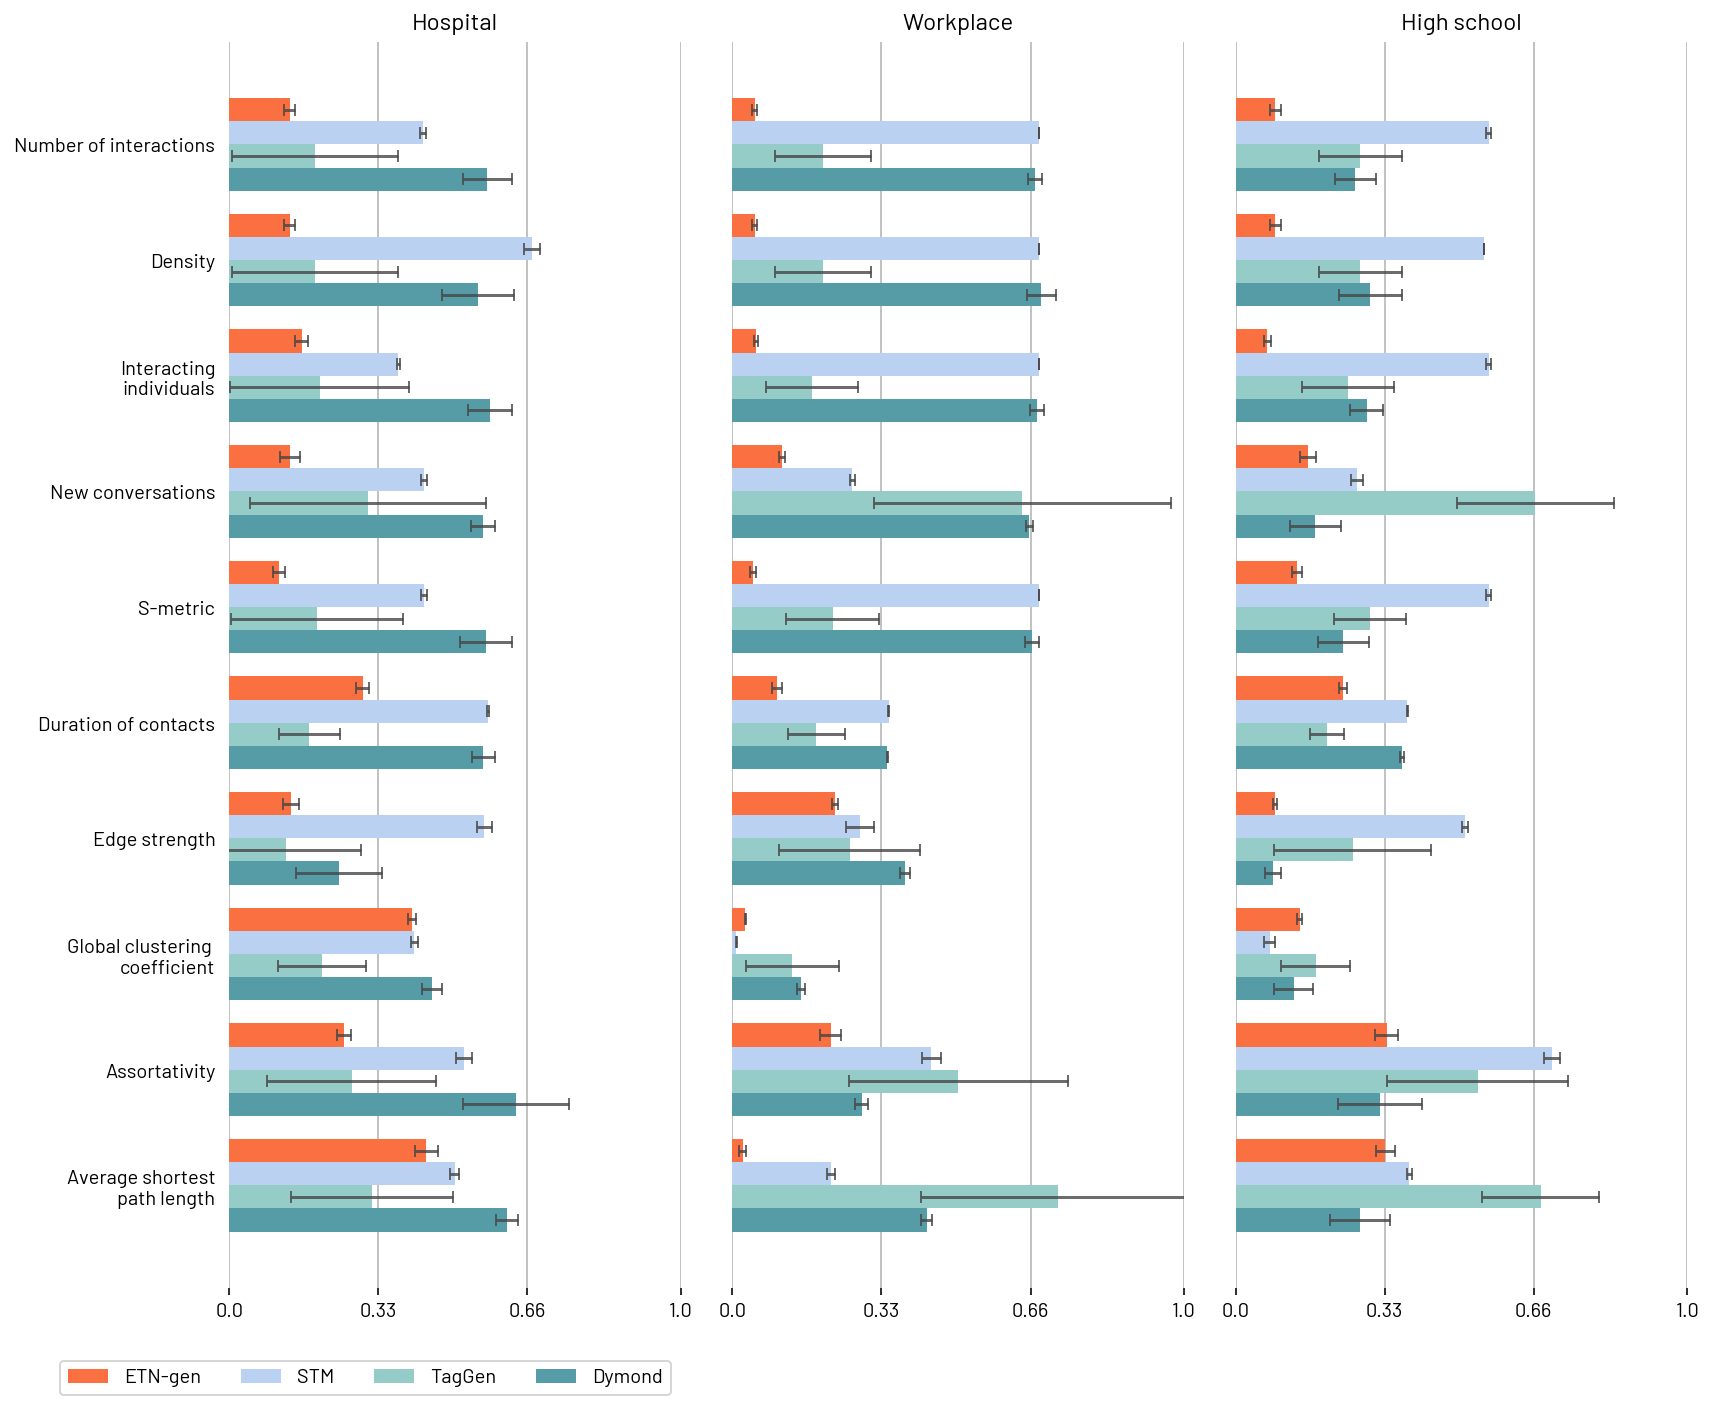

In [428]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np



#labels = list(np.flip(labels))
#labels = tmp
labels = tmp[idx]

x1,x2,x3,x4 = load_topo_res("LH10")
x1,x2,x3,x4 = flip_data(x1,x2,x3,x4)


x = np.arange(len(x1[0]))  # the label locations
width = 0.2  # the width of the bars


fig, ax = plt.subplots(1,3,figsize=(12,10))
fig.tight_layout(pad=-4)


error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=3, capthick=1)

ax[0].title.set_text("Hospital")
rects1 = ax[0].barh(x + 0.3, x1[0], width, xerr=x1[1], label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
rects2 = ax[0].barh(x + 0.1, x2[0], width, xerr=x2[1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
rects3 = ax[0].barh(x - 0.1, x3[0], width, xerr=x3[1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
rects4 = ax[0].barh(x - 0.3, x4[0], width, xerr=x4[1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)


x1,x2,x3,x4 = load_topo_res("InVS13")
x1,x2,x3,x4 = flip_data(x1,x2,x3,x4)
ax[1].title.set_text("Workplace")

rects1 = ax[1].barh(x + 0.3, x1[0], width, xerr=x1[1], label='ETN-gen',color=ETN_COLOR,error_kw=error_bar_style)
rects2 = ax[1].barh(x + 0.1, x2[0], width, xerr=x2[1],label='STM',color=STM_COLOR,error_kw=error_bar_style)
rects3 = ax[1].barh(x - 0.1, x3[0], width, xerr=x3[1],label='TagGen',color=TAG_COLOR,error_kw=error_bar_style)
rects4 = ax[1].barh(x - 0.3, x4[0], width, xerr=x4[1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)



x1,x2,x3,x4 = load_topo_res("High_School11")
x1,x2,x3,x4 = flip_data(x1,x2,x3,x4)
ax[2].title.set_text("High school")
rects1 = ax[2].barh(x + 0.3, x1[0], width, xerr=x1[1], label='ETN-gen',color=ETN_COLOR,error_kw=error_bar_style)
rects2 = ax[2].barh(x + 0.1, x2[0], width, xerr=x2[1],label='STM',color=STM_COLOR,error_kw=error_bar_style)
rects3 = ax[2].barh(x - 0.1, x3[0], width, xerr=x3[1],label='TagGen',color=TAG_COLOR,error_kw=error_bar_style)
rects4 = ax[2].barh(x - 0.3, x4[0], width, xerr=x4[1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)




ax[0].set_yticklabels(labels)
ax[0].set_yticks(x)
ax[0].set_xlim(0,1)

ax[1].set_yticks(x)
ax[1].set_yticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=0)
ax[1].set_xlim(0,1)

ax[2].set_yticks(x)
ax[2].set_xlim(0,1)
ax[2].set_yticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=0)

ax[2].set_xticks([0,0.33,0.66,1])
ax[2].set_xticklabels(["0.0","0.33","0.66","1.0"])
ax[1].set_xticks([0,0.33,0.66,1])
ax[1].set_xticklabels(["0.0","0.33","0.66","1.0"])
ax[0].set_xticks([0,0.33,0.66,1])
ax[0].set_xticklabels(["0.0","0.33","0.66","1.0"])


ax[0].tick_params(bottom=True, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, color='#b3b3b3')
ax[0].yaxis.grid(False)

ax[1].tick_params(bottom=True, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, color='#b3b3b3')
ax[1].yaxis.grid(False)

ax[2].tick_params(bottom=True, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, color='#b3b3b3')
ax[2].yaxis.grid(False)



ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)


ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)


ax[0].legend(loc='upper right',ncol = 5,bbox_to_anchor=(1, -0.05))

fig.tight_layout()
plt.savefig("topology_main_test_1_WithE_V8.pdf", bbox_inches = 'tight')
plt.show()